In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [4]:
df = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
import math

def plot_all_histograms(df: pd.DataFrame, title_prefix: str = ""):

    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i , col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

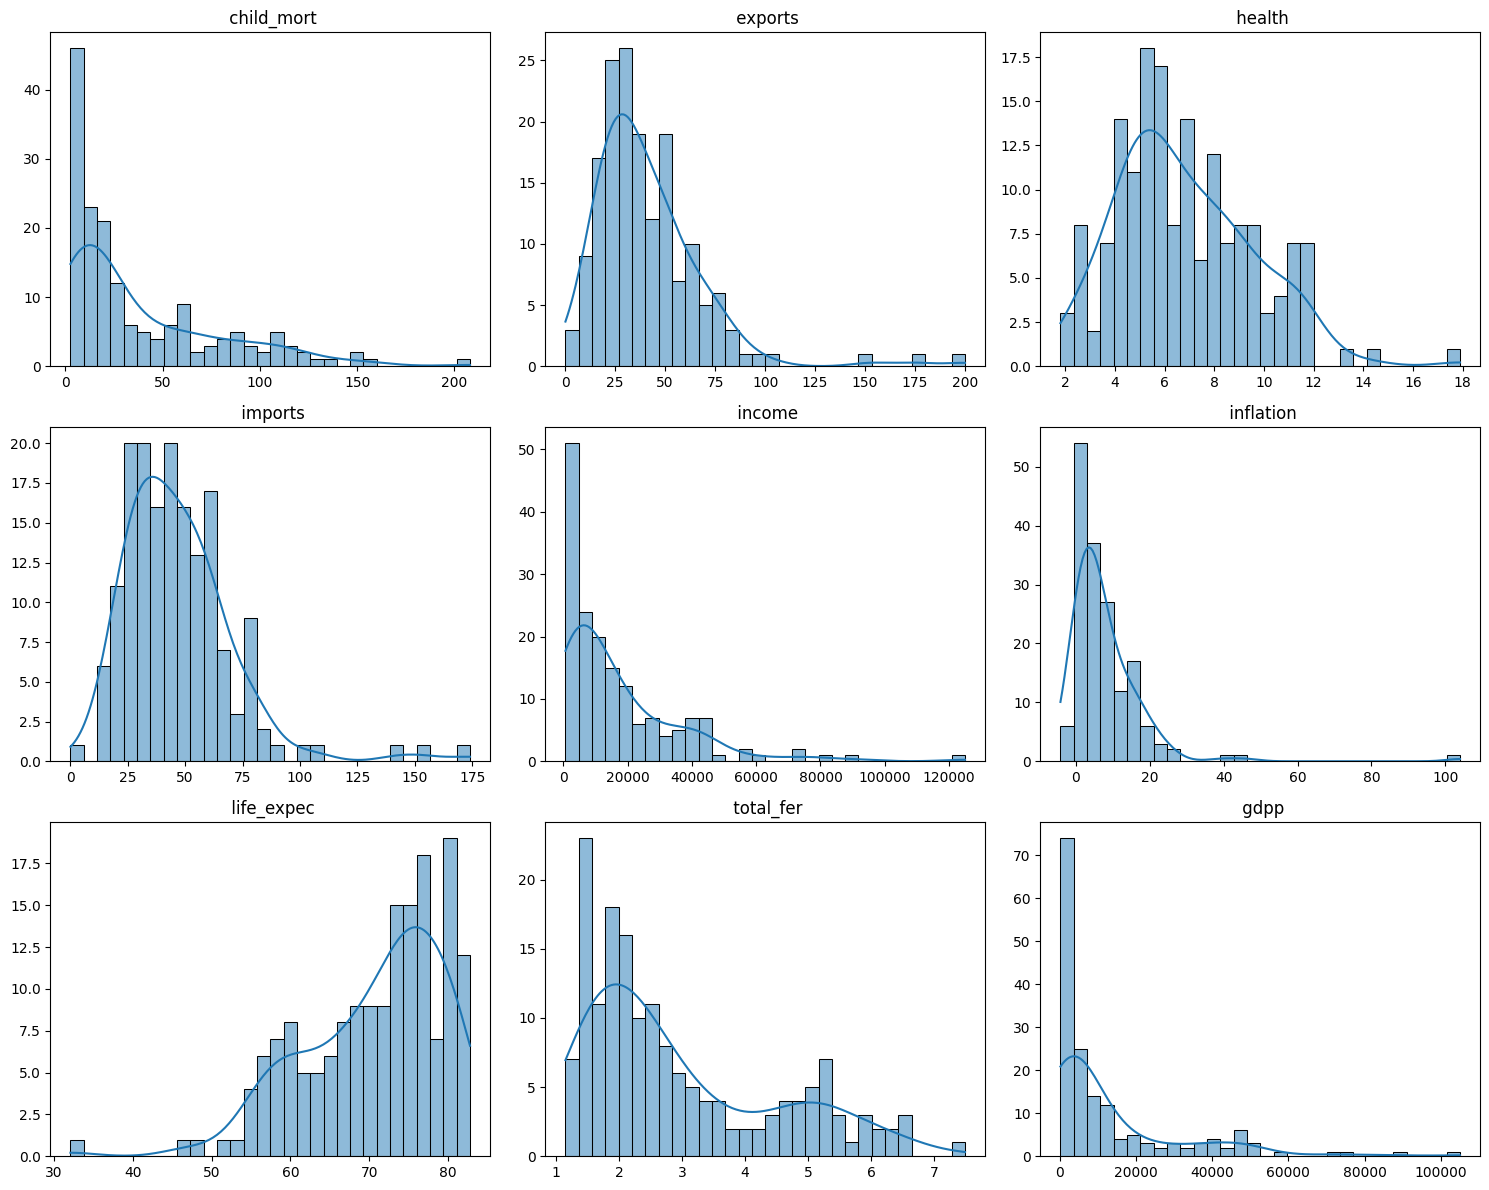

In [9]:
plot_all_histograms(df)

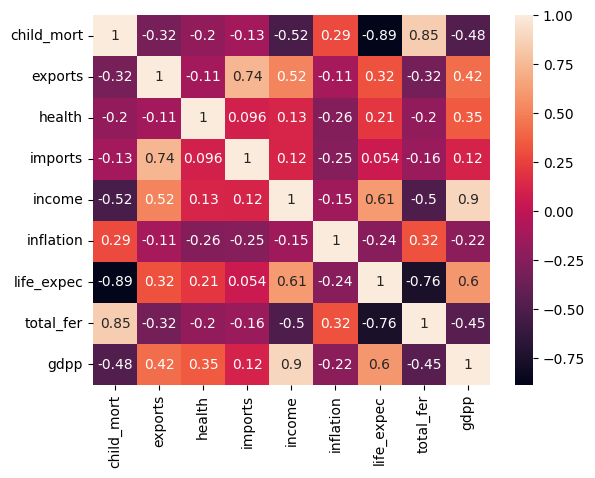

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [11]:
df2 = df.drop("country", axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
df2 = scaler.fit_transform(df2)
df2 = pd.DataFrame(df2, columns=scaler.get_feature_names_out())

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

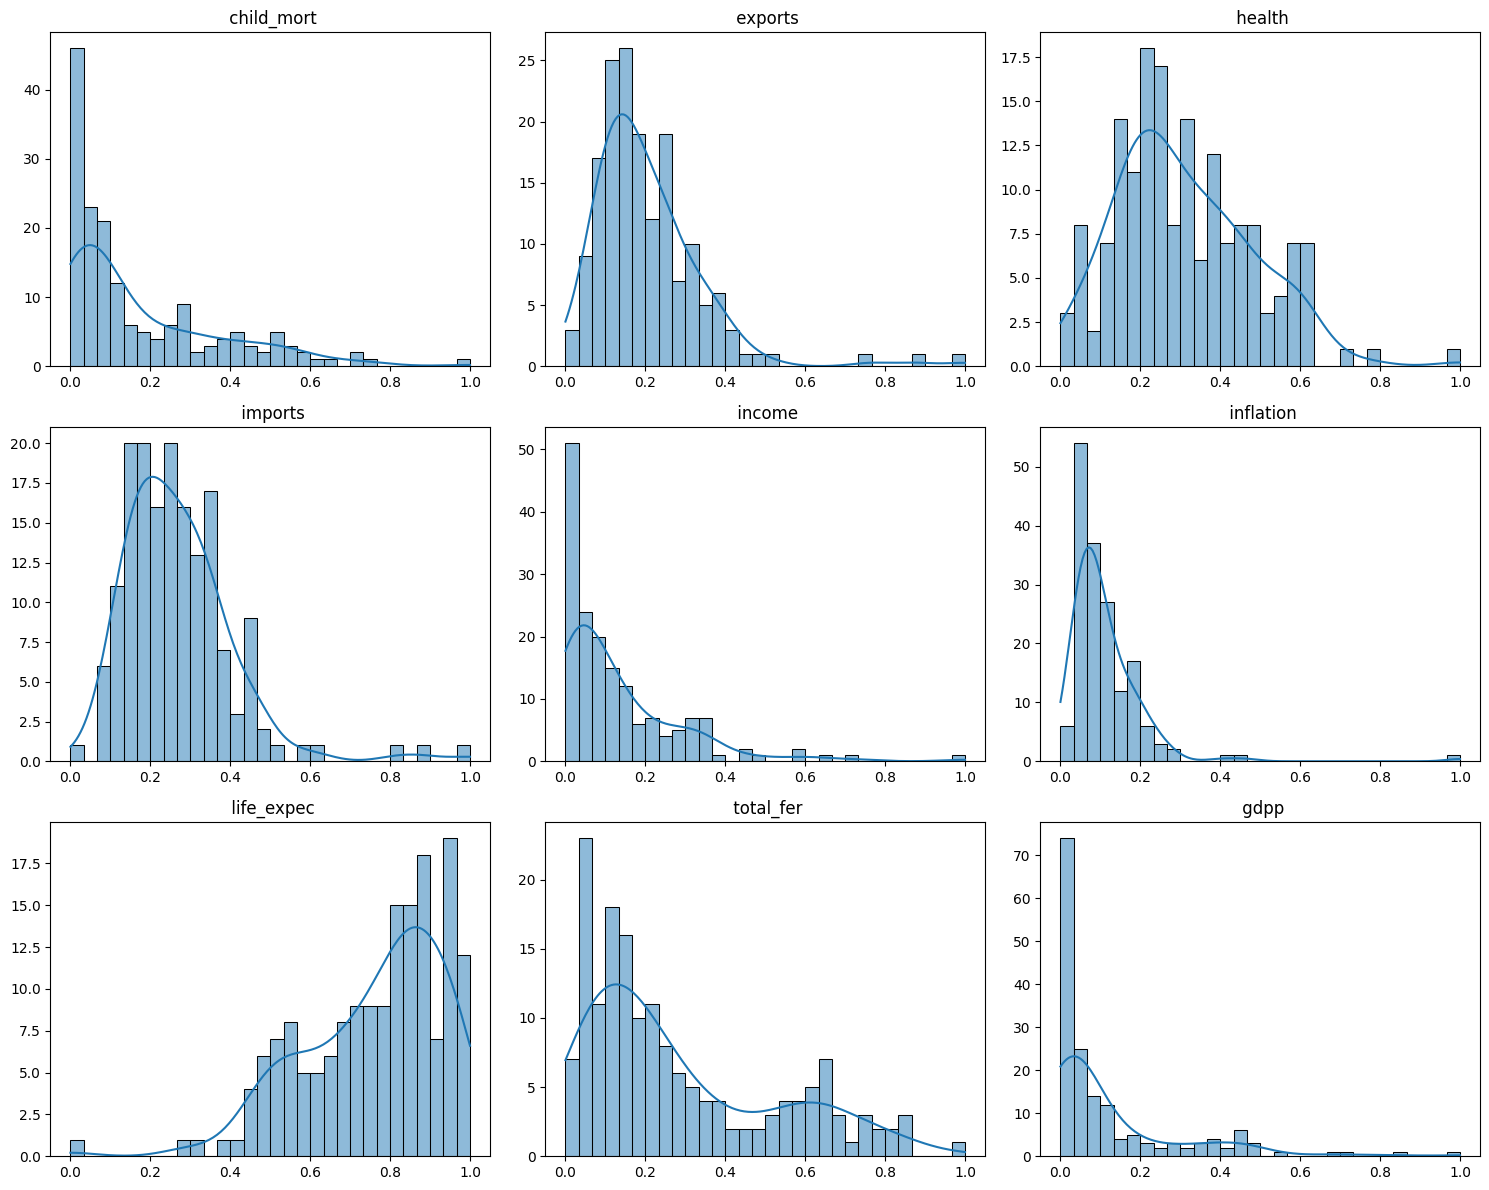

In [15]:
plot_all_histograms(df2)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA()

In [18]:
pca_df2 = pd.DataFrame(pca.fit_transform(df2))

In [19]:
pca_df2.head()

,0,1,2,3,4,5,6,7,8
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532,0.076803,0.040610,0.023572
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246,-0.043567,0.030842,0.029833
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988,-0.045604,-0.010198,0.003012
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170,-0.073985,-0.045195,-0.042241
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817,-0.009559,0.026228,0.022455


In [20]:
pca.explained_variance_

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

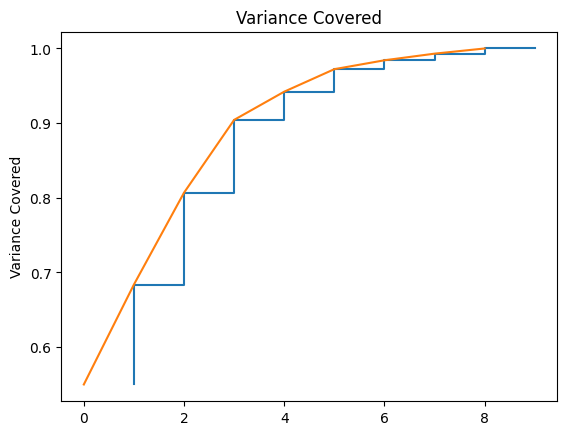

In [21]:
plt.step(list(range(1, 10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Variance Covered")
plt.title("Variance Covered")
plt.show()

In [22]:
pca_df2.drop(columns=[3,4,5,6,7,8], inplace=True)

In [23]:
pca_df2.head()

,0,1,2
0,-0.599078,0.095490,0.157554
1,0.158474,-0.212092,-0.064189
2,0.003686,-0.135867,-0.134182
3,-0.650235,0.275975,-0.142672
4,0.200711,-0.064662,-0.100715


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(pca_df2)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
wcss

[34.5330292530818,
 17.685954209577112,
 11.270622261541517,
 8.973914858796016,
 7.229327464682727,
 6.209141070384802,
 5.202010407897813,
 4.6704216493267605,
 4.282648935699199,
 3.9703715715332546]

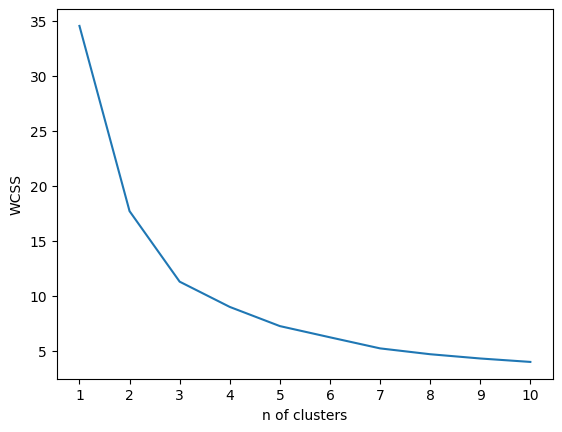

In [27]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("n of clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
model = KMeans(n_clusters=3, init="k-means++")
model.fit(pca_df2)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
labels = model.labels_

In [30]:
silhouette_score(pca_df2, labels)

0.43863203452366817

In [31]:
df["class"] = labels

In [32]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


Text(0.5, 1.0, 'income vs class')

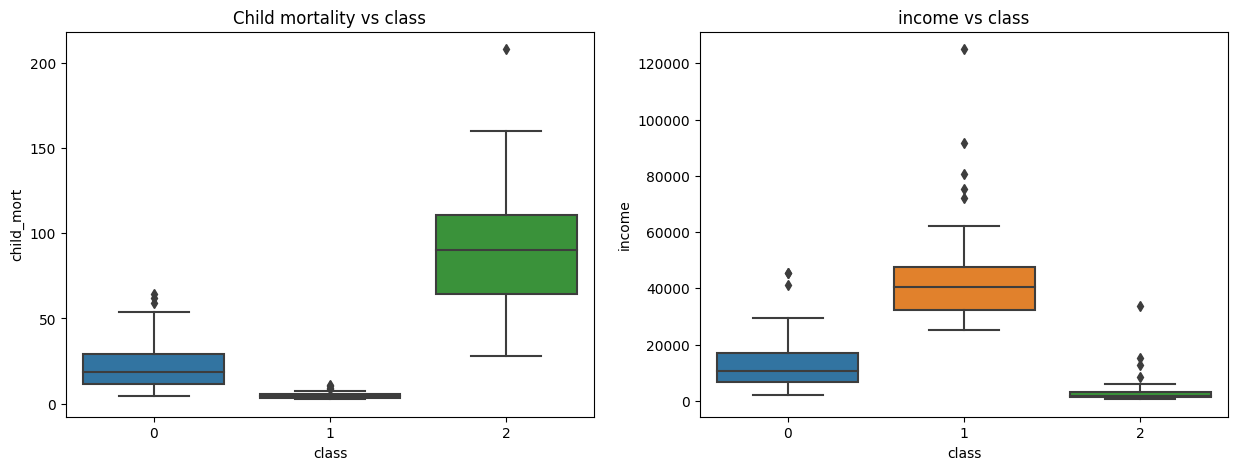

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="class", y="child_mort")
plt.title("Child mortality vs class")
plt.subplot(1,2,2)
sns.boxplot(data=df, x="class", y="income")
plt.title("income vs class")


In [34]:
#0 == No Budget Needed
#1 == Budget definitely required
#2 == In between

## !!!The values represented can change between runs. Always double check.

In [35]:
import plotly.express as px

In [36]:
pca_df2.insert(0, column="Country", value=df["country"])

In [37]:
pca_df2["class"] = labels

In [38]:
pca_df2.loc[pca_df2["class"] == 0, "class"] = "No Budget Needed"
pca_df2.loc[pca_df2["class"] == 1, "class"] = "Budget Needed"
pca_df2.loc[pca_df2["class"] == 2, "class"] = "In Between"

/tmp/ipykernel_13/1578105954.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Budget Needed' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  pca_df2.loc[pca_df2["class"] == 0, "class"] = "No Budget Needed"


In [39]:
pca_df2.head()

,Country,0,1,2,class
0,Afghanistan,-0.599078,0.095490,0.157554,In Between
1,Albania,0.158474,-0.212092,-0.064189,No Budget Needed
2,Algeria,0.003686,-0.135867,-0.134182,No Budget Needed
3,Angola,-0.650235,0.275975,-0.142672,In Between
4,Antigua and Barbuda,0.200711,-0.064662,-0.100715,No Budget Needed


In [40]:
fig = px.choropleth(
    pca_df2[["Country", "class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Budget by Country",
    color= pca_df2["class"],
    color_discrete_map={
        "Budget Needed": "Red",
        "In Between": "Yellow",
        "No Budget Needed": "Green",
    }
)

fig.update_geos(fitbounds="locations", visible=True)
fig.show()